In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')



In [138]:
# 1. Load the cars dataset
cars=pd.read_csv(r'C:\Users\kkbal\OneDrive\Desktop\kk\ML DV\autos_small.csv',na_values='.')
cars.head()


,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [98]:
# 2. Figure out the best strategy to fill missing values
cars.info()
cars.gearbox.unique()
cars=pd.read_csv(r'C:\Users\kkbal\OneDrive\Desktop\kk\ML DV\autos_small.csv',na_values='.')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
gearbox        10000 non-null int32
model          10000 non-null int32
vehicleType    10000 non-null int32
fuelType       10000 non-null int32
brand          10000 non-null int32
dtypes: int32(5)
memory usage: 195.4 KB


In [4]:
cars.describe()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer
count,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000
mean,7.056705e+03,2003.637400,5.737600,122.01890,125034.000000
std,1.237501e+05,40.424633,3.706794,342.09721,40581.689607
min,0.000000e+00,1000.000000,0.000000,0.00000,5000.000000
25%,1.150000e+03,1999.000000,3.000000,69.00000,100000.000000
50%,2.999000e+03,2004.000000,6.000000,105.00000,150000.000000
75%,7.250000e+03,2008.000000,9.000000,150.00000,150000.000000
max,1.234568e+07,5000.000000,12.000000,17322.00000,150000.000000


In [5]:
# filling zeros with NAN vallues
cars.monthOfRegistration[cars.monthOfRegistration==0]
cars.monthOfRegistration[cars.monthOfRegistration==0]=np.nan
cars.monthOfRegistration[(np.isnan(cars.monthOfRegistration))]


1      NaN
2      NaN
13     NaN
18     NaN
19     NaN
        ..
9943   NaN
9960   NaN
9986   NaN
9991   NaN
9997   NaN
Name: monthOfRegistration, Length: 1060, dtype: float64

In [7]:
# fillig zeros with nan values
cars.powerPS[cars.powerPS==0]
cars.powerPS[cars.powerPS==0]=np.nan
cars.powerPS[(np.isnan(cars.powerPS))]

cars.price[cars.price==0]
cars.price[cars.price==0]=np.nan
cars.price[(np.isnan(cars.price))]

cars.eq(0).any().any()
cars.drop_duplicates()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400.0,Ford_Escort,1992,8.0,manuell,89.0,escort,60000,benzin,ford,kombi
1,3500.0,Bmw_320_cabrio,1996,NaN,manuell,150.0,3er,125000,NaN,bmw,cabrio
2,2200.0,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,NaN,manuell,150.0,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000.0,A3_Limousine,2006,7.0,manuell,NaN,a3,150000,diesel,audi,limousine
4,2600.0,Smart_Smart_cabrio_450_cdi,2002,7.0,automatik,41.0,fortwo,150000,diesel,smart,cabrio
...,...,...,...,...,...,...,...,...,...,...,...
9995,2650.0,Opel_Corsa_C_1.2_Twinport,2005,1.0,manuell,80.0,corsa,150000,benzin,opel,kleinwagen
9996,9600.0,Volkswagen_Touran_2.0_TDI_DPF,2011,6.0,manuell,140.0,touran,150000,diesel,volkswagen,bus
9997,1500.0,Suche_zuverlaessigen_Kombi,1999,NaN,NaN,101.0,astra,150000,NaN,opel,kombi
9998,970.0,Renault_Twingo,2002,10.0,manuell,58.0,twingo,150000,benzin,renault,kleinwagen


In [8]:
## finiding the amount of null values
cars_nullity=cars.isnull()
cars_nullity.sum()
cars_nullity.mean()*100

price                   3.08
name                    0.00
yearOfRegistration      0.00
monthOfRegistration    10.60
gearbox                 5.77
powerPS                11.07
model                   5.67
kilometer               0.00
fuelType                9.43
brand                   0.00
vehicleType            10.50
dtype: float64

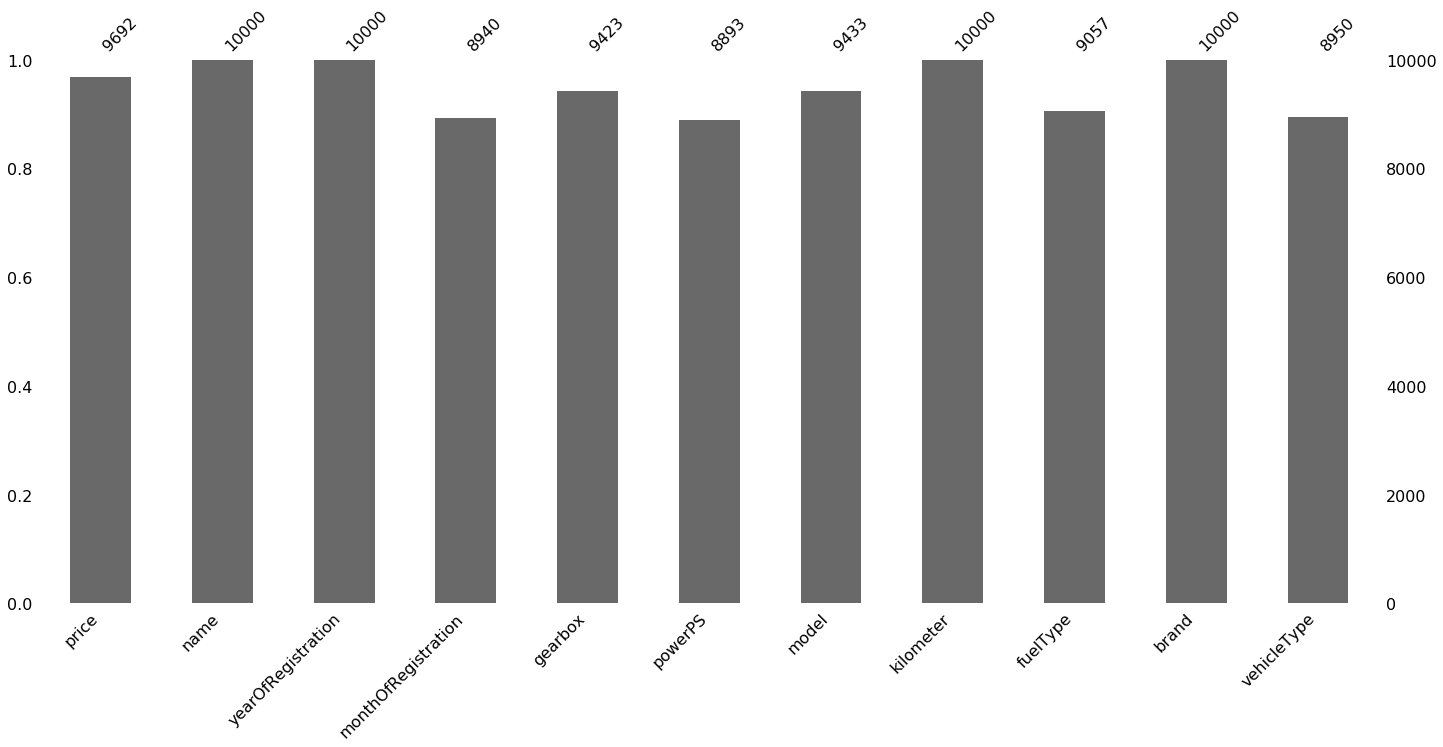

In [9]:
msno.bar(cars)

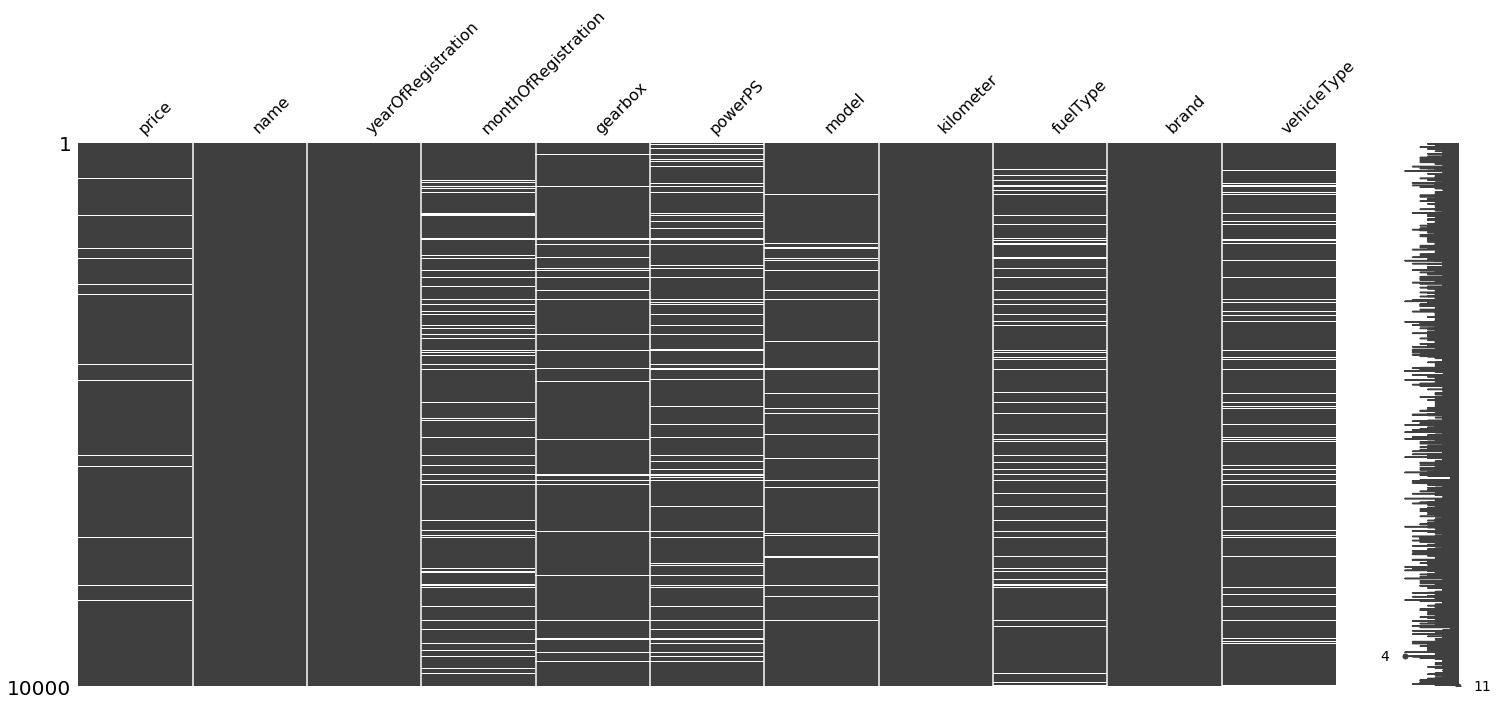

In [10]:
msno.matrix(cars)

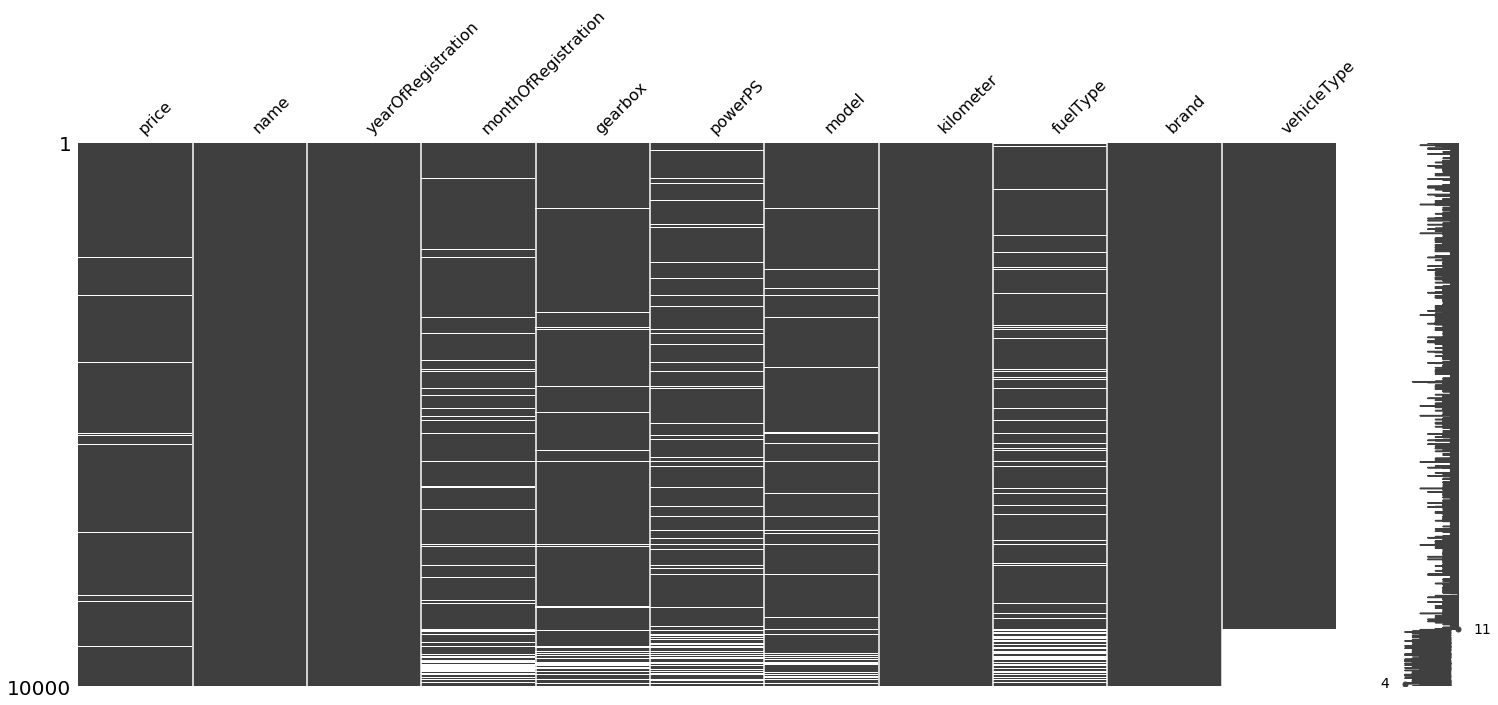

In [11]:
sorteds=cars.sort_values('vehicleType')
msno.matrix(sorteds)


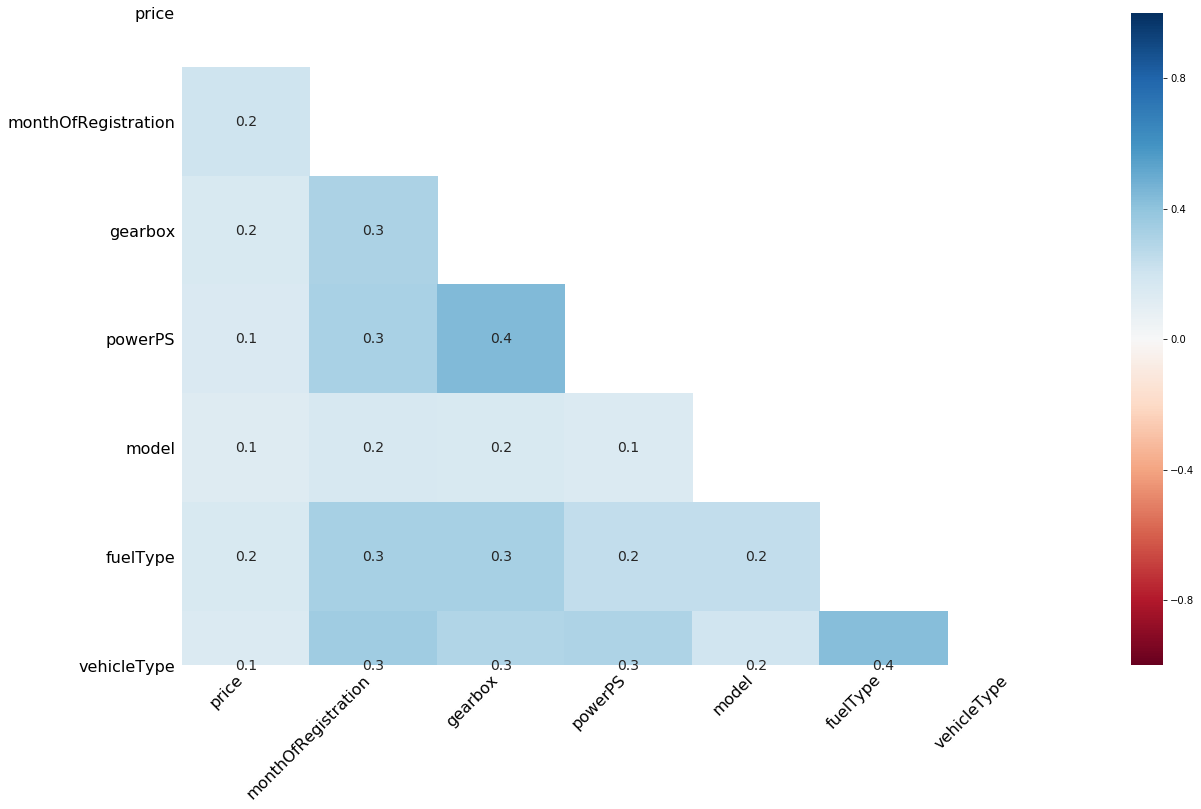

In [12]:
#finding correlation btw missingness
msno.heatmap(cars)

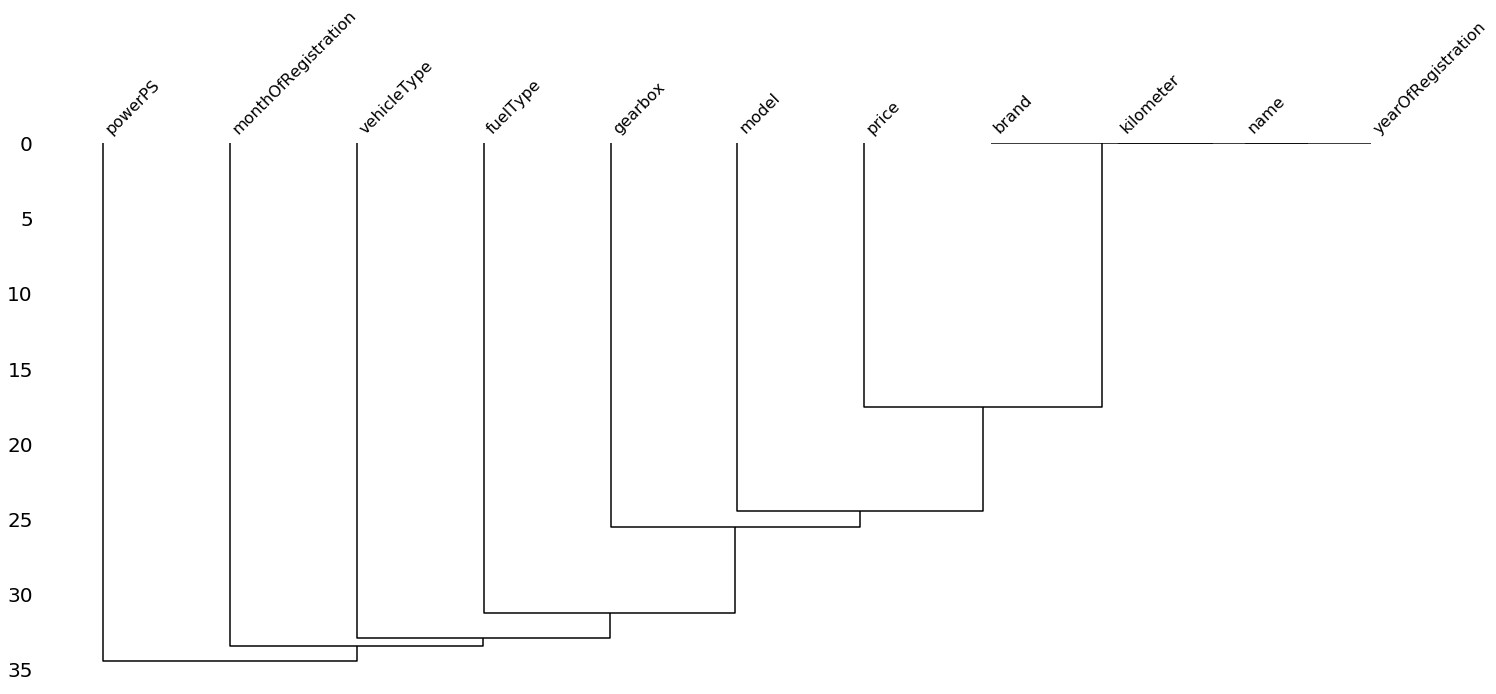

In [13]:
msno.dendrogram(cars)

In [14]:
## dropping columns that are not needed
cars.dropna(subset=['price'],how='all',inplace=True)
cars

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400.0,Ford_Escort,1992,8.0,manuell,89.0,escort,60000,benzin,ford,kombi
1,3500.0,Bmw_320_cabrio,1996,NaN,manuell,150.0,3er,125000,NaN,bmw,cabrio
2,2200.0,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,NaN,manuell,150.0,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000.0,A3_Limousine,2006,7.0,manuell,NaN,a3,150000,diesel,audi,limousine
4,2600.0,Smart_Smart_cabrio_450_cdi,2002,7.0,automatik,41.0,fortwo,150000,diesel,smart,cabrio
...,...,...,...,...,...,...,...,...,...,...,...
9995,2650.0,Opel_Corsa_C_1.2_Twinport,2005,1.0,manuell,80.0,corsa,150000,benzin,opel,kleinwagen
9996,9600.0,Volkswagen_Touran_2.0_TDI_DPF,2011,6.0,manuell,140.0,touran,150000,diesel,volkswagen,bus
9997,1500.0,Suche_zuverlaessigen_Kombi,1999,NaN,NaN,101.0,astra,150000,NaN,opel,kombi
9998,970.0,Renault_Twingo,2002,10.0,manuell,58.0,twingo,150000,benzin,renault,kleinwagen


In [15]:
men=cars.powerPS.mean()
cars.shape

(9692, 11)

In [16]:

cars['powerPS'].fillna(men,inplace=True)
cars

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400.0,Ford_Escort,1992,8.0,manuell,89.000000,escort,60000,benzin,ford,kombi
1,3500.0,Bmw_320_cabrio,1996,NaN,manuell,150.000000,3er,125000,NaN,bmw,cabrio
2,2200.0,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,NaN,manuell,150.000000,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000.0,A3_Limousine,2006,7.0,manuell,137.708966,a3,150000,diesel,audi,limousine
4,2600.0,Smart_Smart_cabrio_450_cdi,2002,7.0,automatik,41.000000,fortwo,150000,diesel,smart,cabrio
...,...,...,...,...,...,...,...,...,...,...,...
9995,2650.0,Opel_Corsa_C_1.2_Twinport,2005,1.0,manuell,80.000000,corsa,150000,benzin,opel,kleinwagen
9996,9600.0,Volkswagen_Touran_2.0_TDI_DPF,2011,6.0,manuell,140.000000,touran,150000,diesel,volkswagen,bus
9997,1500.0,Suche_zuverlaessigen_Kombi,1999,NaN,NaN,101.000000,astra,150000,NaN,opel,kombi
9998,970.0,Renault_Twingo,2002,10.0,manuell,58.000000,twingo,150000,benzin,renault,kleinwagen


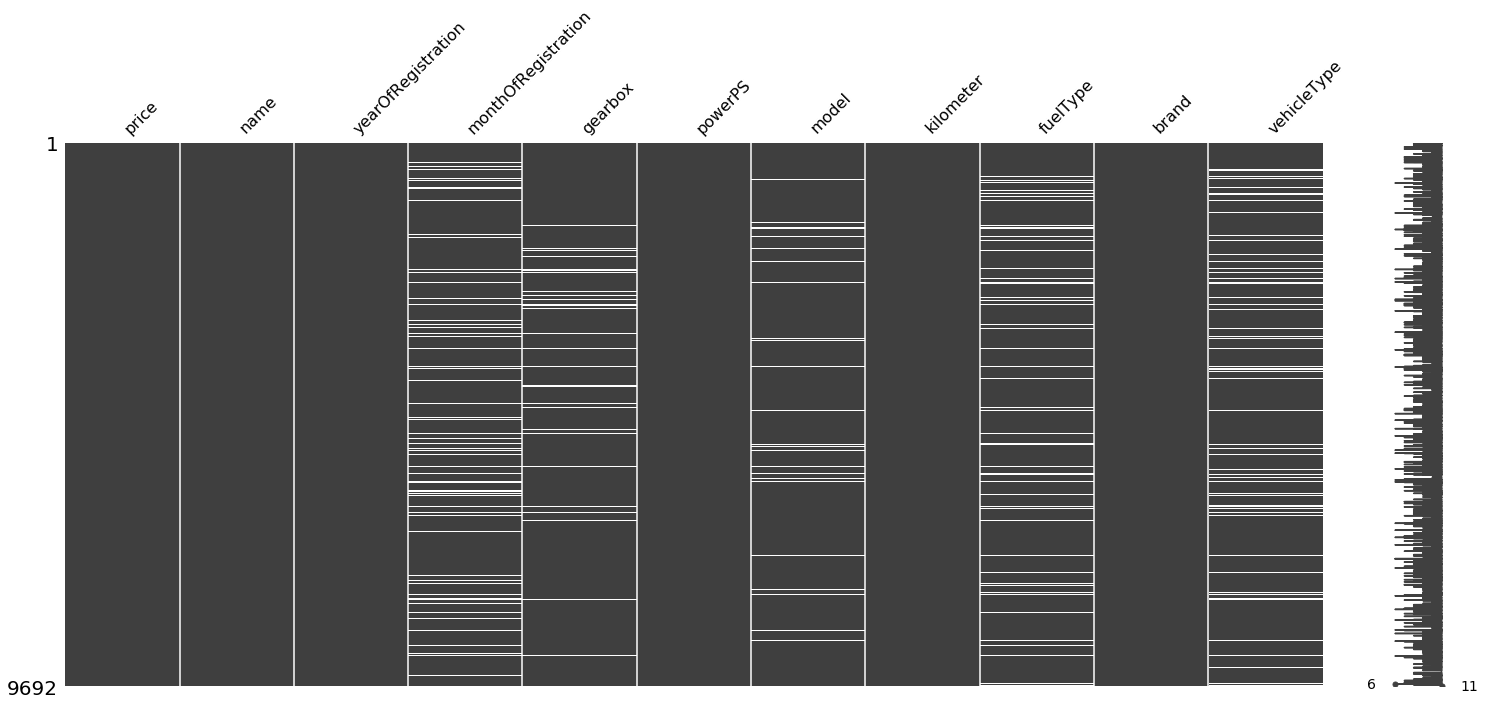

In [17]:
men1=cars.kilometer.mean()
men1
cars['kilometer'].fillna(men1,inplace=True)
cars
msno.matrix(cars)

In [18]:
## finding different categories values
cars.gearbox.value_counts()
cars.model.value_counts()
cars.fuelType.value_counts()
cars.brand.value_counts()
cars.vehicleType.value_counts()

limousine     2463
kleinwagen    2087
kombi         1735
bus            835
cabrio         629
coupe          529
suv            381
andere          92
Name: vehicleType, dtype: int64

In [46]:
## converting categorical to numerical values
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
cars['gearbox']=label.fit_transform(cars['gearbox'].astype(str))
cars['model']=label.fit_transform(cars['model'].astype(str))
cars['vehicleType']=label.fit_transform(cars['vehicleType'].astype(str))
cars['fuelType']=label.fit_transform(cars['fuelType'].astype(str))
cars['brand']=label.fit_transform(cars['brand'].astype(str))
cars



,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,1,89,103,60000,1,6,5
1,3500,Bmw_320_cabrio,1996,0,1,150,166,125000,7,36,2
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,1,150,227,150000,1,37,5
3,4000,A3_Limousine,2006,7,1,0,197,150000,3,1,6
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,0,41,110,150000,3,38,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,2650,Opel_Corsa_C_1.2_Twinport,2005,1,1,80,177,150000,1,5,4
9996,9600,Volkswagen_Touran_2.0_TDI_DPF,2011,6,1,140,141,150000,3,8,1
9997,1500,Suche_zuverlaessigen_Kombi,1999,0,2,101,22,150000,7,5,5
9998,970,Renault_Twingo,2002,10,1,58,16,150000,1,7,4


In [68]:
categorical=cars[['gearbox','model','vehicleType','fuelType','brand']]
categorical.shape

(10000, 5)

In [67]:
## creating correspoding columns
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder(categorical_features = [1], sparse=False)
x=onehot.fit_transform(categorical)
x=np.round(x)
x.shape

                               

C:\Users\kkbal\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(10000, 240)

In [216]:
# converting into dummy variables
categorical=cars[['gearbox','model','vehicleType','fuelType','brand']]
dummy=pd.get_dummies(categorical,prefix_sep='-',drop_first=True)

cars_new=pd.concat([cars,dummy],axis=1)
cars_new.head()
cars_new.columns
cars_new=cars_new.drop(['gearbox','model','vehicleType','fuelType','brand','name'],axis=1)
cars_new.head()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer,gearbox-manuell,model-145,model-147,model-156,model-159,...,brand-seat,brand-skoda,brand-smart,brand-sonstige_autos,brand-subaru,brand-suzuki,brand-toyota,brand-trabant,brand-volkswagen,brand-volvo
0,400,1992,8,89,60000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3500,1996,0,150,125000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2200,1998,0,150,150000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4000,2006,7,0,150000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2600,2002,7,41,150000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [171]:
cars_new.isnull().any().sum()

0

In [229]:

cars_new.info()
cars_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 292 entries, price to brand-volvo
dtypes: int64(5), uint8(287)
memory usage: 3.1 MB


,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer,gearbox-manuell,model-145,model-147,model-156,model-159,...,brand-seat,brand-skoda,brand-smart,brand-sonstige_autos,brand-subaru,brand-suzuki,brand-toyota,brand-trabant,brand-volkswagen,brand-volvo
0,400,1992,8,89,60000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3500,1996,0,150,125000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2200,1998,0,150,150000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4000,2006,7,0,150000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2600,2002,7,41,150000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [231]:

X= cars_new.iloc[:,0].values
X

array([ 400, 3500, 2200, ..., 1500,  970, 7990], dtype=int64)

In [232]:
## using extra tree classifier
X= cars_new.iloc[:,0].values
Y= cars_new.iloc[:,2:].values


from sklearn.ensemble import ExtraTreesClassifier
treeclass= ExtraTreesClassifier()

feat=treeclass.fit(Y,X)
feat.feature_importances_





array([2.41064646e-01, 2.86016388e-01, 8.70252899e-02, 2.18037295e-02,
       8.76584890e-05, 1.08589090e-03, 8.42630968e-04, 2.84796495e-04,
       1.09770146e-03, 1.59639213e-03, 6.56835392e-05, 1.78708914e-03,
       2.29312570e-03, 4.37289050e-03, 5.79230240e-04, 7.53638441e-04,
       5.39162968e-04, 2.40310748e-03, 5.38456967e-04, 9.00040750e-04,
       4.29184950e-04, 7.70802900e-04, 8.19026566e-04, 1.09441470e-04,
       1.90753469e-04, 1.86029607e-04, 7.28991664e-04, 3.37137102e-04,
       4.13257746e-04, 2.60547447e-03, 2.75665577e-03, 7.04913865e-04,
       2.50778984e-03, 6.38087950e-04, 2.10219528e-03, 4.27449729e-04,
       4.55809898e-04, 2.82931026e-04, 6.92108590e-04, 1.87235435e-04,
       7.66025590e-05, 1.21734001e-02, 8.77782965e-05, 4.74177496e-04,
       3.18538039e-03, 2.66857760e-04, 4.39453700e-04, 1.31495026e-04,
       3.83457220e-04, 8.53077527e-04, 9.15860603e-04, 4.99828868e-04,
       8.32863572e-04, 2.63913312e-04, 2.77098765e-04, 3.27968670e-04,
      

In [246]:
importance=feat.feature_importances_
featurename=cars_new.iloc[:,2:].columns.tolist()
featurename
feature_dir=dict(zip(featurename,importance))
feature=sorted(feature_dir.items(),key=lambda x: x[1],reverse=True)
feature_dir
feature


[('powerPS', 0.28601638818542235),
 ('monthOfRegistration', 0.2410646463065913),
 ('kilometer', 0.08702528987929949),
 ('gearbox-manuell', 0.02180372949131085),
 ('fuelType-benzin', 0.01834291900631709),
 ('vehicleType-limousine', 0.0177571737165775),
 ('vehicleType-kombi', 0.01696594270789652),
 ('model-andere', 0.01217340009149994),
 ('vehicleType-kleinwagen', 0.010841487998547509),
 ('vehicleType-bus', 0.010424386254876733),
 ('fuelType-diesel', 0.010217111279718926),
 ('vehicleType-coupe', 0.008846903526594894),
 ('brand-volkswagen', 0.006966968794145064),
 ('model-golf', 0.006577060486734811),
 ('brand-ford', 0.005267098798869812),
 ('vehicleType-suv', 0.004983539450648749),
 ('brand-mercedes_benz', 0.004805848640528754),
 ('brand-audi', 0.0047020179647946974),
 ('vehicleType-cabrio', 0.004436766122406939),
 ('model-3er', 0.0043728904990869375),
 ('brand-bmw', 0.004352182822967861),
 ('model-polo', 0.004288514532343045),
 ('fuelType-lpg', 0.004127351560689795),
 ('brand-peugeot', 

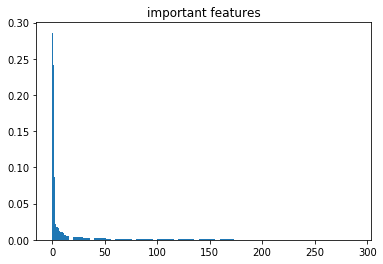

In [247]:
plt.bar(range(len(feature)), [imp[1] for imp in feature], align='center')
plt.title('important features');

In [253]:
## selecting top values
from sklearn.feature_selection import SelectFromModel
abc=SelectFromModel(feat,prefit=True)
y_updated=abc.transform(Y)
y_updated
print('Total Features count:', np.array(Y).shape[1])
print('Selected Features: ' ,np.array(y_updated).shape[1])


Total Features count: 290
Selected Features:  27


In [270]:
# 4. Apply various regression models and find out which model is the best for this dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(y_updated, x, test_size = 0.2, random_state = 0)

## scaling the value
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [283]:
## predicting the model

from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
x_test=mlr.fit(X_train,y_train)
pred=mlr.predict(X_test)


In [284]:
from sklearn.metrics import r2_score
r2_lr = r2_score(y_test,pred)

r2_knn=r2_score(y_test, pred)
r2_lr, r2_knn

(0.0640955439663104, 0.0640955439663104)

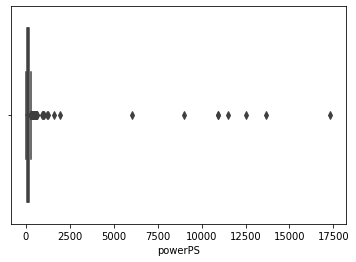

In [293]:
# 5. Apply different Outlier detection methods and choose best approach to treat outliers 
sns.boxplot(data=cars_new,x='powerPS')


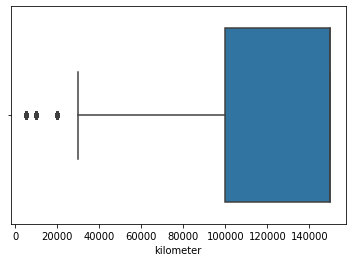

In [295]:
sns.boxplot(cars['kilometer'])

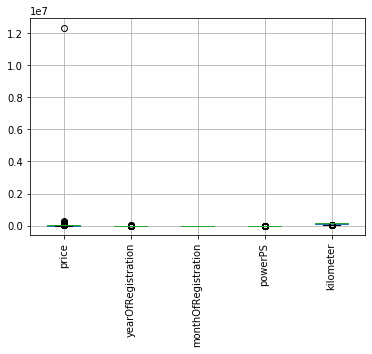

In [309]:
## removing outliers
std=cars['kilometer'].mean()
mean=cars['kilometer'].std()
cutoff=std*3

lower,upper= mean-cutoff,mean+cutoff
new_kilo=cars[(cars['kilometer']>lower)&(cars['kilometer']<upper)]


std=cars['powerPS'].mean()
mean=cars['powerPS'].std()
cutoff=std*3

lower,upper= mean-cutoff,mean+cutoff
new_kilo=cars[(cars['powerPS']>lower)&(cars['powerPS']<upper)]
new_kilo.boxplot(rot=90)



In [323]:
X=cars_new.iloc[:,2:]
X


,monthOfRegistration,powerPS,kilometer,gearbox-manuell,model-145,model-147,model-156,model-159,model-1_reihe,model-1er,...,brand-seat,brand-skoda,brand-smart,brand-sonstige_autos,brand-subaru,brand-suzuki,brand-toyota,brand-trabant,brand-volkswagen,brand-volvo
0,8,89,60000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,150,125000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,150,150000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,150000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,41,150000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,80,150000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,6,140,150000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9997,0,101,150000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,10,58,150000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [324]:
# 6. Apply Variance Inflation Factors calculation and find if the model built has collinearity between different variables

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_df = pd.DataFrame()
vif_df["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df["features"] = X.columns
print(vif_df)



           vif             features
0     3.712959  monthOfRegistration
1     1.217814              powerPS
2    12.623550            kilometer
3     5.331842      gearbox-manuell
4     1.003978            model-145
..         ...                  ...
285   2.307735         brand-suzuki
286   4.790749         brand-toyota
287   2.794363        brand-trabant
288  23.391532     brand-volkswagen
289   5.034590          brand-volvo

[290 rows x 2 columns]


In [335]:
c=(vif_df.vif<=5)
(vif_df.vif<=5).value_counts()


True     254
False     36
Name: vif, dtype: int64